In [90]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Column Meanings for reference --->>> hourly_usd_vs_eur:
1. Index.
2. Date = Date in yyyy-mm-dd format.
3. Time = Hour in which the price was measured.
4. BO - Opening Bid Price aka what the dealer is willing to pay for a currency "at opening".
5. BH - Highest Bid Price for that hour.
6. BL - Lowest Big Price for that hour. 
7. BC - Closing Bid Price for that hour.
8. BCh - Change between open and close price within that hour. 
9. AO - Opening ask Price for that hour
10. AH - Highest ask price in that one hour period. 
11. AL - Lowest ask price in that hour period. 

* Big Goal: Build a ML/DL model to identify correlation between the two markets over the time. 
* Awareness: 
1. Cause-Effect - Will need to add time delay
    * Will need to research how to add time delays as this is a new concept. 
2. Model type - This could be a simple (Linear) or a slightly complicated model.

In [91]:
hourly_usd_vs_eur = pd.read_csv("eurusd_hour.csv")
hourly_usd_vs_eur

,Date,Time,BO,BH,BL,BC,BCh,AO,AH,AL,AC,ACh
0,2005-05-02,00:00,1.28520,1.28520,1.28400,1.28440,-0.00080,1.28540,1.28540,1.28420,1.28460,-0.00080
1,2005-05-02,01:00,1.28440,1.28480,1.28390,1.28420,-0.00020,1.28460,1.28500,1.28410,1.28440,-0.00020
2,2005-05-02,02:00,1.28430,1.28540,1.28410,1.28510,0.00080,1.28450,1.28560,1.28430,1.28530,0.00080
3,2005-05-02,03:00,1.28510,1.28590,1.28500,1.28510,0.00000,1.28530,1.28610,1.28520,1.28530,0.00000
4,2005-05-02,04:00,1.28520,1.28590,1.28490,1.28550,0.00030,1.28540,1.28610,1.28510,1.28570,0.00030
...,...,...,...,...,...,...,...,...,...,...,...,...
93079,2020-04-29,18:00,1.08620,1.08851,1.08611,1.08713,0.00093,1.08660,1.08865,1.08640,1.08726,0.00066
93080,2020-04-29,19:00,1.08711,1.08823,1.08659,1.08748,0.00037,1.08725,1.08837,1.08675,1.08760,0.00035
93081,2020-04-29,20:00,1.08747,1.08788,1.08691,1.08708,-0.00039,1.08758,1.08810,1.08706,1.08808,0.00050
93082,2020-04-29,21:00,1.08708,1.08740,1.08699,1.08714,0.00006,1.08808,1.08814,1.08763,1.08766,-0.00042


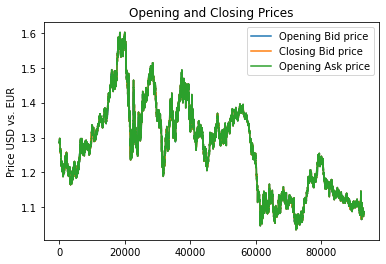

In [92]:
#Analysis using matplotlib (graphing)
hourly_usd_vs_eur['BO'].plot(label = 'Opening Bid price')
hourly_usd_vs_eur['BC'].plot(label = 'Closing Bid price')
hourly_usd_vs_eur['AO'].plot(label = 'Opening Ask price')
plt.legend()
plt.title('Opening and Closing Prices')
plt.ylabel('Price USD vs. EUR')
plt.show()

The graphs for each category are very close together...so split up the graph in time to see Zoomed in Version

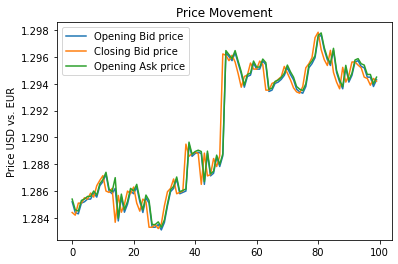

In [93]:
df_100 = hourly_usd_vs_eur.head(100)

#Analysis using matplotlib (graphing)
df_100['BO'].plot(label = 'Opening Bid price')
df_100['BC'].plot(label = 'Closing Bid price')
df_100['AO'].plot(label = 'Opening Ask price')
plt.legend()
plt.title('Price Movement')
plt.ylabel('Price USD vs. EUR')
plt.show()


So even zoomed in version shows that the Opening Bid Price, Closing Bid Price, and Opening Ask Price are very similar in their movement on their graph. This suggests that they are probably highly dependent variables. So when building a model, using only 1 variable (Ex: Closing Bid Price) should work to understand the trend. 

In [94]:
#Checking the matrix plot of correlation
hourly_usd_vs_eur.corr()

,BO,BH,BL,BC,BCh,AO,AH,AL,AC,ACh
BO,1.000000,0.999953,0.999955,0.999926,-0.007440,0.999999,0.999953,0.999954,0.999926,-0.005658
BH,0.999953,1.000000,0.999920,0.999959,-0.000901,0.999953,0.999999,0.999920,0.999958,0.000831
BL,0.999955,0.999920,1.000000,0.999960,-0.000885,0.999954,0.999919,1.000000,0.999960,0.000893
BC,0.999926,0.999959,0.999960,1.000000,0.004729,0.999926,0.999958,0.999960,0.999999,0.006451
BCh,-0.007440,-0.000901,-0.000885,0.004729,1.000000,-0.007414,-0.000914,-0.000864,0.004707,0.995076
AO,0.999999,0.999953,0.999954,0.999926,-0.007414,1.000000,0.999953,0.999954,0.999926,-0.005689
AH,0.999953,0.999999,0.999919,0.999958,-0.000914,0.999953,1.000000,0.999919,0.999958,0.000812
AL,0.999954,0.999920,1.000000,0.999960,-0.000864,0.999954,0.999919,1.000000,0.999960,0.000908
AC,0.999926,0.999958,0.999960,0.999999,0.004707,0.999926,0.999958,0.999960,1.000000,0.006492
ACh,-0.005658,0.000831,0.000893,0.006451,0.995076,-0.005689,0.000812,0.000908,0.006492,1.000000


In [95]:
#Group By Dates
df_group = hourly_usd_vs_eur.groupby("Date").agg("mean").reset_index()
df_group

,Date,BO,BH,BL,BC,BCh,AO,AH,AL,AC,ACh
0,2005-05-02,1.285468,1.286136,1.284941,1.285476,0.000008,1.285678,1.286334,1.285126,1.285687,0.000008
1,2005-05-03,1.286334,1.287308,1.285567,1.286427,0.000093,1.286500,1.287485,1.285738,1.286591,0.000091
2,2005-05-04,1.294374,1.295347,1.293517,1.294647,0.000274,1.294528,1.295504,1.293671,1.294804,0.000276
3,2005-05-05,1.295118,1.295977,1.294439,1.295139,0.000021,1.295287,1.296144,1.294610,1.295308,0.000021
4,2005-05-06,1.290402,1.290939,1.289189,1.289783,-0.000619,1.290611,1.291150,1.289400,1.290030,-0.000581
...,...,...,...,...,...,...,...,...,...,...,...
4667,2020-04-24,1.077860,1.078893,1.077069,1.078075,0.000216,1.078004,1.079053,1.077208,1.078259,0.000255
4668,2020-04-26,1.081917,1.082097,1.081507,1.081883,-0.000033,1.082220,1.082547,1.081817,1.082150,-0.000070
4669,2020-04-27,1.083510,1.084053,1.082841,1.083530,0.000020,1.083690,1.084252,1.083015,1.083703,0.000013
4670,2020-04-28,1.083713,1.084505,1.082993,1.083762,0.000049,1.083909,1.084678,1.083162,1.083924,0.000015


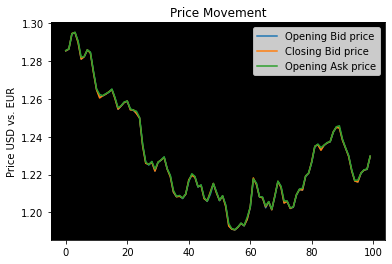

In [96]:
ax = plt.axes()
ax.set_facecolor("black")
df_group_sample = df_group.head(100)
df_group_sample['BO'].plot(label = 'Opening Bid price')
df_group_sample['BC'].plot(label = 'Closing Bid price')
df_group_sample['AO'].plot(label = 'Opening Ask price')
plt.legend()
plt.title('Price Movement')
plt.ylabel('Price USD vs. EUR')
plt.show()

Let's take a look at the correlation matrix in a more visual way.

Text(0.5, 1.0, 'Correlation Heatmap')

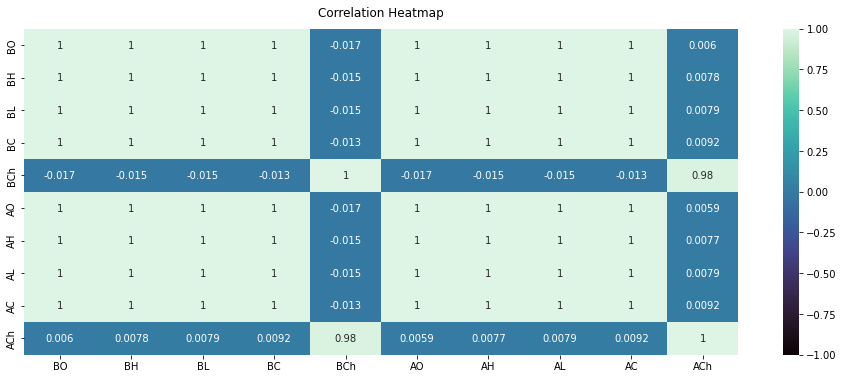

In [97]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df_group.corr(),cmap= 'mako',  vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

So this makes it clear how most of the variables are highly correlated to each other, thus for ML model using 1 variable like "Closing Bid Price" is good enough since using more will create duplicacies in our model's interpretation, which we do not want. 

## <font color='magenta'>For some reason, I cannot use Tensorflow and/or Keras libraries on Mac M1 setup on VS Code,therefore I am going to iterate through my solution in a more explanatory way</font>

1.) We first need to prepare the data for the model. 
    I have already grouped the data in terms of days, so what we can do is to split our df_group (df with groupby) into training and testing datasets. 
    
    Firstly, I would say we can just use 'BC' as the column and we should scale it between (-1,1) using the MinMaxScaler function. This would allow each of our dates closing bid price to be in a scaled version between -1 and 1. This would maintain the scale of our original data too. 
    
    Secondly, we should use about 1000 prediction days. This would mean that our model will be trained approximately 25% data. The other 75% would be used for testing. 

    Third, we can create two numpy arrays...
    x_train which would be the scaled data of Bid Closing Price "prediction days" before the "predictive day".
    y_train which would be the scaled data of Bid Closing Price from predictive day to the end of our scaled data. 

    Visual: 
    0|--------x_train-------|Predictive Day (We Decided approx. 1000)|---------y_train-----------|End of sclaed data.

2.) Choosing and Applying Model.
    Based on my experience, since the data has "time/date" as one of the Independent Variables, using Sequential() as the data model would be a good choice. 

    I would say to really harness the power of ML, I would use Neural Networks that create layers to our Sequential model. 

                                                ##SAMPLE CODE IF TENSORFLOW WORKED ON MY MAC😂##

    ##Setting up the Neural Networks##
    (1) model.add(LSTM(units = 50, return_sequences=True, input_shape=(x_train.shape[1], 1))) #Input (1st) Layer
    (2) model.add(Dropout(0.2))
    (3) model.add(LSTM(units = 50, return_sequences=True)) #Middle Layer
    (4) model.add(Dropout(0.2))
    (5) model.add(LSTM(units = 50)) #Final Layer
    (6) model.add(Dropout(0.2))
    (7) model.add(Dense(units=1)) #Prediction of the next closing price

    ##Choosing an optimizer to apply the model##
    (1) model.compile(optimizer = 'adam', loss = 'mean_squared_error')
    (2) model.fit(x_train, y_train, epochs=25, batch_size=32)

    On line 1, we are using an adam optimizer which includes two gradient descents because it takes care of the "momentum" of change. We also are optimizing the mean_squared_error of our model's prediction and the actual Closing Bid Price.

    On line 2, we apply the sequential model with neural networks of 3 layers that "tweaks" the models prediction using adam optimizer to optimize the mean_squared_error. The model repeats this process for 25 epochs with a batch_sze of 32 which means it takes 32 intital points/dates for Neural Network 1st layer.

3.) Compare the Model Predicted BC Price to Actual BC Price
    This is the part that is open ended as it can be done visually or numerically. Since, I am not able to give the output, I would just explain my approach that includes the visual path because I do not have numbers at the moment. 

    (1) Graph the predicted price (x-axis) vs. actual price (y-axis)...you should see some difference unlike previous line graphs since this is comparing the models output and actual data. If it perfectly fits, that means we just overfitted our model (which is bad), so just decrease the prediction_days to a smaller number. 

    (2) Determine the case:
    
    Case 1: If the lines look similar in direction/movement on graph, we can assume that the correlation remains unchanged since the datapoint of predicted is close 

    Case 2: If the lines are very different or do not have a good percentage of similarity in direction/movement, then the model we chose either is not a good model to  pick and/or the model is underfitted. Changing the fitting of the exisitng model is self-explanatory based on Case 1. Choosing a different model (which I do not expect but...you never know) would require a bit of research and reading of the data more closely. 

4.) END.







### <span style='color:teal '> My Analysis: </span>
        
    I definitely did not expect running into the issue of not being able to TensorFlow, thus did not have enough time to research alternatives. So I am assuming I do not have the best Correlation Analysis as there isn't a tangible version I am able to present. Therefore, I would say I was not able to come to a conlusion and did not use the "correct metrics for model evaluation". I did eliminate the extra features such as redundant columns and I definitely think my work should be readable and understandable. If not, definitely let me know. 

    I believe overall my documentation is solid, but the code category is weak due to the technical issue.

    I really loved working on this prompt, apart from the TensorFlow not working, and I would love to be part of Quant. There are no excuses to not being able to deliver the requirements asked, but I do hope that my work did contribute something or at least entertaining to look at 😅. 

    I would like to thank Quant for this opportunity, and hope to hear back from you guys soon. Till then, let me fix my tensorflow. 

    Regards,
    A🐝 